In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("../data/prices_scores_clean.csv")
df = df.rename(columns=({"Unnamed: 0":"date"}))
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df = df.reset_index().rename(columns={'date': 'ds', 'price':'y'})
df

,ds,y,BTC_score,twitter_score,reddit_score
0,2018-02-01,9052.5763,0.496911,0.569701,0.429601
1,2018-02-02,8827.6300,0.479340,0.552322,0.430662
2,2018-02-03,9224.3913,0.495011,0.585380,0.453424
3,2018-02-04,8186.6488,0.499830,0.554089,0.444839
4,2018-02-05,6914.2600,0.469328,0.529476,0.438090
...,...,...,...,...,...
1165,2021-01-27,30425.3933,0.451524,0.568092,0.512576
1166,2021-01-28,33420.0450,0.461012,0.588805,0.541803
1167,2021-01-29,34264.0100,0.497264,0.614617,0.575444
1168,2021-01-30,34324.2717,0.490272,0.562461,0.525758


In [96]:
df2 = pd.read_csv("../data/prices_greed_score_clean.csv")
df2

,date,price,Fear&Greed
0,2018-02-01,9052.5763,30
1,2018-02-02,8827.6300,15
2,2018-02-03,9224.3913,40
3,2018-02-04,8186.6488,24
4,2018-02-05,6914.2600,11
...,...,...,...
1117,2021-02-25,47104.7833,79
1118,2021-02-26,46329.7400,55
1119,2021-02-27,46189.3783,56
1120,2021-02-28,45256.4133,55


In [100]:
df2.corr()

,price,Fear&Greed
price,1.000000,0.604052
Fear&Greed,0.604052,1.000000


In [82]:
corr = df.corr()
corr 

,y,BTC_score,twitter_score,reddit_score
y,1.000000,-0.297017,0.113083,0.517409
BTC_score,-0.297017,1.000000,0.141279,-0.046454
twitter_score,0.113083,0.141279,1.000000,0.421662
reddit_score,0.517409,-0.046454,0.421662,1.000000


<AxesSubplot:>

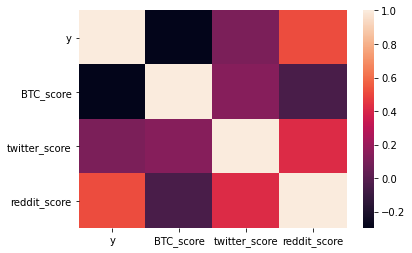

In [81]:
import seaborn as sns
sns.heatmap(corr)

In [70]:
from fbprophet import Prophet 

X_train = fb_df.iloc[:-30]
X_test = fb_df.iloc[-30:]

print(X_train.shape)
print(X_test.shape)

(1140, 2)
(30, 2)


In [71]:
X_train

,ds,y
0,2018-02-01,9052.5763
1,2018-02-02,8827.6300
2,2018-02-03,9224.3913
3,2018-02-04,8186.6488
4,2018-02-05,6914.2600
...,...,...
1135,2020-12-28,27041.8667
1136,2020-12-29,27353.9783
1137,2020-12-30,28886.0400
1138,2020-12-31,28956.2650


In [85]:
model = Prophet(seasonality_mode='multiplicative')

In [86]:
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
forecat_test = model.predict(X_test)

In [88]:
forecat_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-01-02,22398.741147,27910.511765,29565.698677,22398.741147,22398.741147,0.283512,0.283512,0.283512,0.000172,0.000172,0.000172,0.283340,0.283340,0.283340,0.0,0.0,0.0,28749.048327
1,2021-01-03,22467.477577,28204.581552,29782.110056,22467.477577,22467.477577,0.291937,0.291937,0.291937,-0.003131,-0.003131,-0.003131,0.295068,0.295068,0.295068,0.0,0.0,0.0,29026.559207
2,2021-01-04,22536.214006,28653.761250,30247.883651,22536.214006,22536.214006,0.306402,0.306402,0.306402,0.001045,0.001045,0.001045,0.305357,0.305357,0.305357,0.0,0.0,0.0,29441.353880
3,2021-01-05,22604.950436,28986.626307,30544.664940,22604.950436,22604.950436,0.315582,0.315582,0.315582,0.001394,0.001394,0.001394,0.314188,0.314188,0.314188,0.0,0.0,0.0,29738.656004
4,2021-01-06,22673.686865,29167.565805,30859.184277,22673.686865,22673.686865,0.322027,0.322027,0.322027,0.000461,0.000461,0.000461,0.321566,0.321566,0.321566,0.0,0.0,0.0,29975.227042


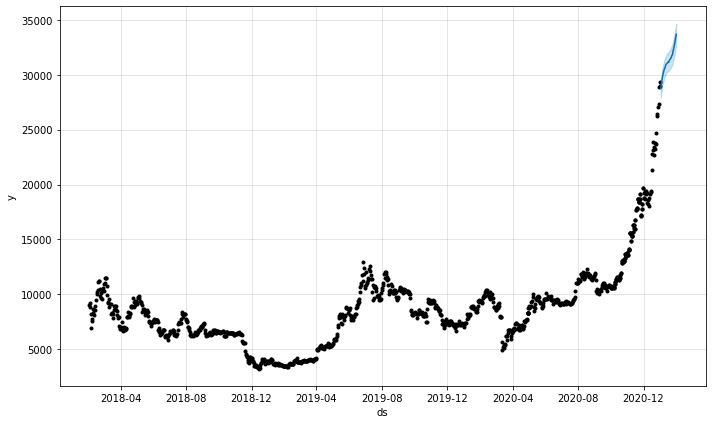

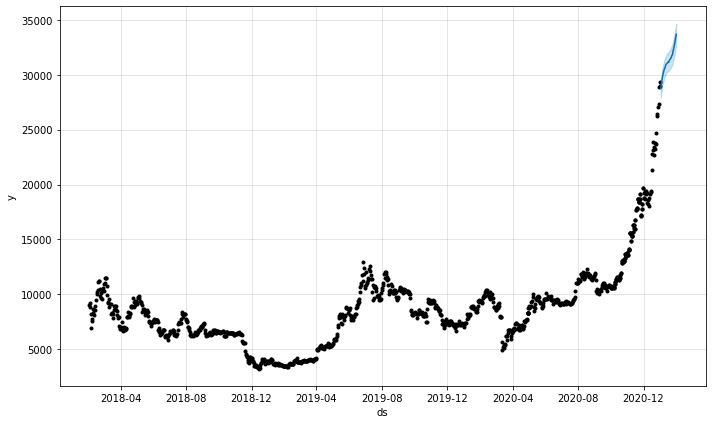

In [89]:
model.plot(forecat_test)

In [78]:
future = model.make_future_dataframe(periods=30, freq='MS')
forecast_future = model.predict(future)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-02-01,5969.357346,7563.618423,9092.322706,5969.357346,5969.357346,0.392671,0.392671,0.392671,-0.000086,-0.000086,-0.000086,0.392757,0.392757,0.392757,0.0,0.0,0.0,8313.353270
1,2018-02-02,6007.058901,7576.291695,9252.006487,6007.058901,6007.058901,0.404408,0.404408,0.404408,0.000146,0.000146,0.000146,0.404262,0.404262,0.404262,0.0,0.0,0.0,8436.363652
2,2018-02-03,6044.760456,7723.676755,9363.898649,6044.760456,6044.760456,0.416537,0.416537,0.416537,0.000172,0.000172,0.000172,0.416366,0.416366,0.416366,0.0,0.0,0.0,8562.628929
3,2018-02-04,6082.462012,7871.340587,9504.367925,6082.462012,6082.462012,0.425785,0.425785,0.425785,-0.003131,-0.003131,-0.003131,0.428916,0.428916,0.428916,0.0,0.0,0.0,8672.280519
4,2018-02-05,6120.163567,7981.421156,9634.516222,6120.163567,6120.163567,0.442792,0.442792,0.442792,0.001045,0.001045,0.001045,0.441747,0.441747,0.441747,0.0,0.0,0.0,8830.123415


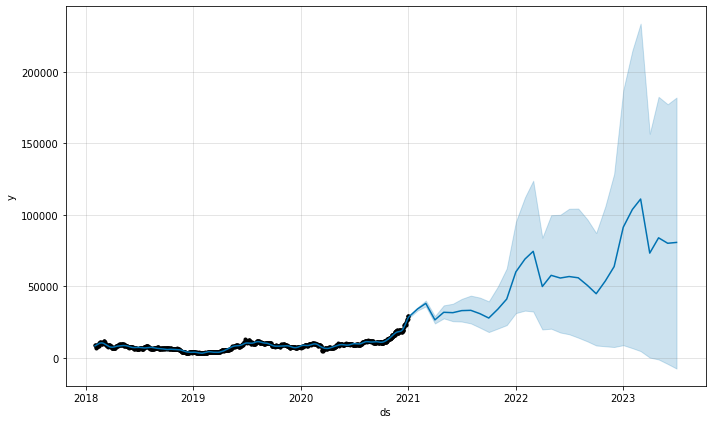

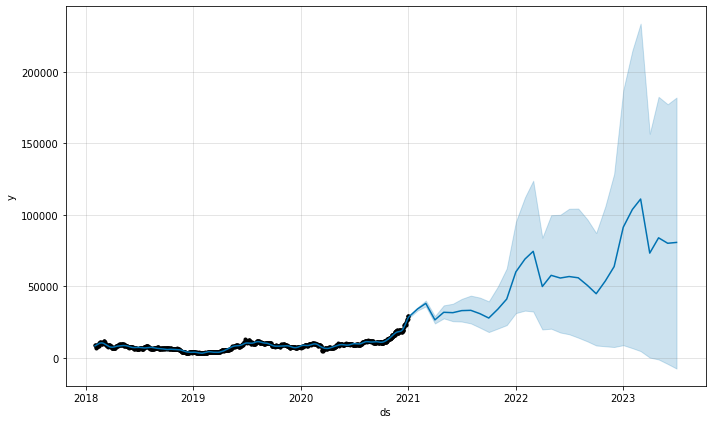

In [79]:
model.plot(forecast_future)